In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8)
}
matplotlib.rcParams.update(mplparams)

## FF=0

In [2]:
data = np.loadtxt('./results/BF_scaling_220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]

In [3]:
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.50001 +- 0.00005


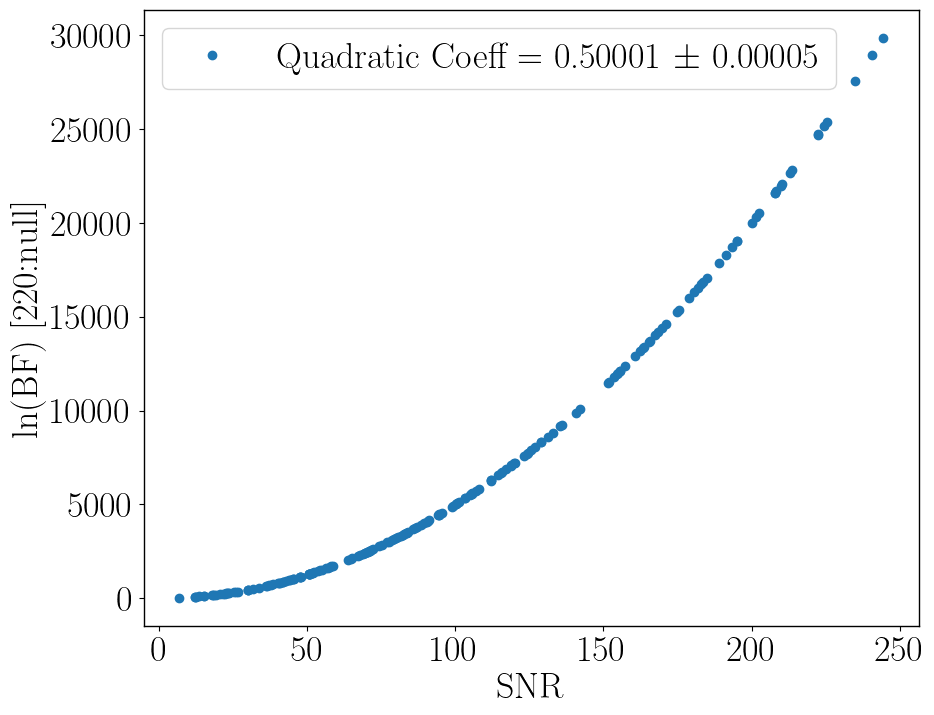

In [4]:
pl.plot(SNRtot_MF, log_BF, 'o', label=r'Quadratic Coeff = %.5f $\pm$ %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:null]")
pl.legend()

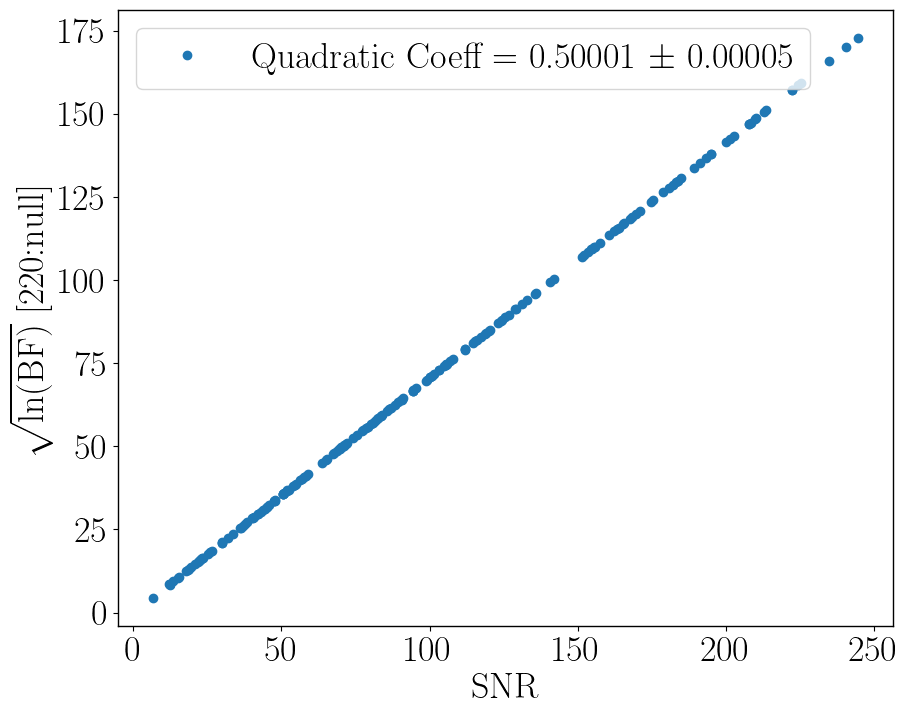

In [5]:
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.5f $\pm$ %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel(r'$\sqrt{\mathrm{ln(BF)}}$ [220:null]')
pl.legend()
pl.savefig("SNR_scaling-220:null.pdf")

Text(0.5, 0, 'Injected SNR')

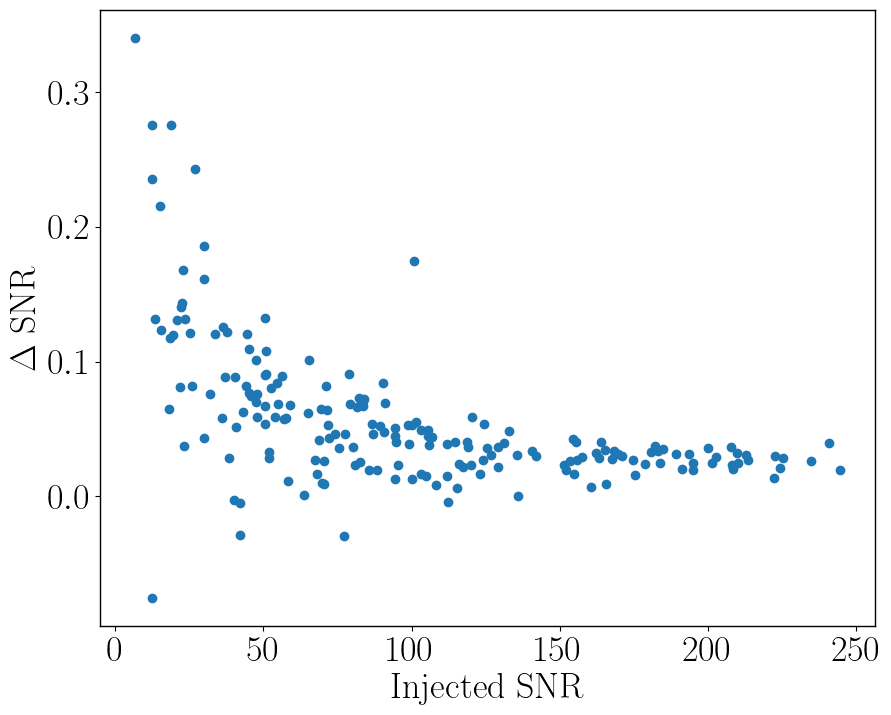

In [6]:
inferred_SNR = np.sqrt(2*log_BF - np.log(occams))
pl.plot(SNRtot_MF, SNRtot_MF - inferred_SNR, 'o')
pl.ylabel(r'$\Delta$ SNR')
pl.xlabel("Injected SNR")

### Checking low SNR regime

Text(0, 0.5, 'Frequency')

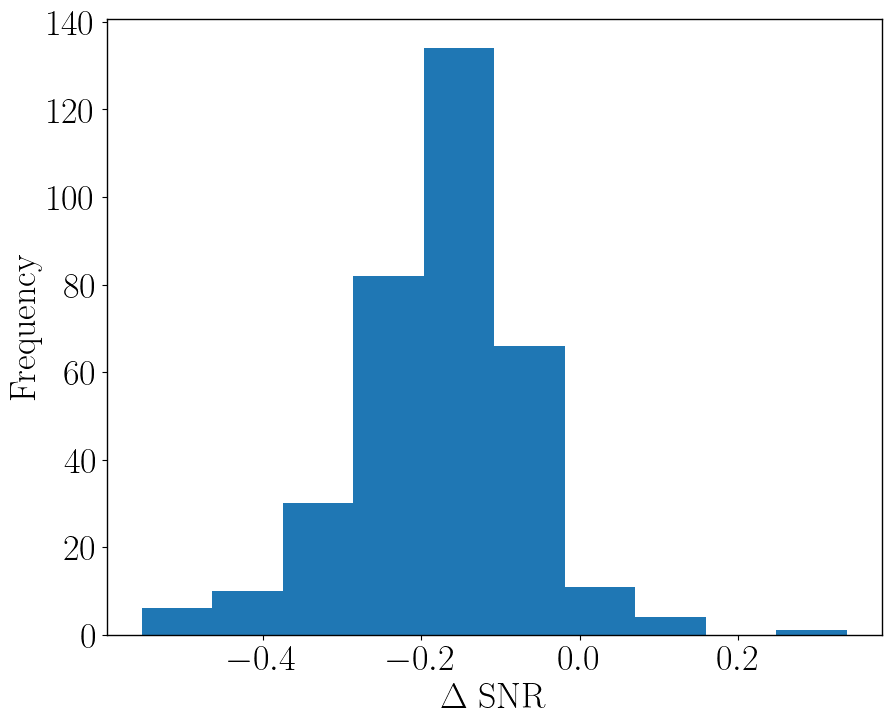

In [7]:
data = np.loadtxt('./results/BF_scaling_low_SNR220_ALL.dat')
idx = data.T[0]>9
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]
inferred_SNR = np.sqrt(2*log_BF - np.log(occams))
residual = inferred_SNR - SNRtot_MF
# pl.plot(inferred_SNR, SNRtot_MF)
pl.hist(residual);

# data = np.loadtxt('./results/BF_scaling_diff_acf_220_ALL.dat')
# idx = data.T[0]<250
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]
# inferred_SNR = np.sqrt(2*log_BF - np.log(occams))
# residual = inferred_SNR - SNRtot_MF
# pl.plot(inferred_SNR, SNRtot_MF)
# pl.hist(residual);
pl.xlabel(r'$\Delta$ SNR')
pl.ylabel("Frequency")

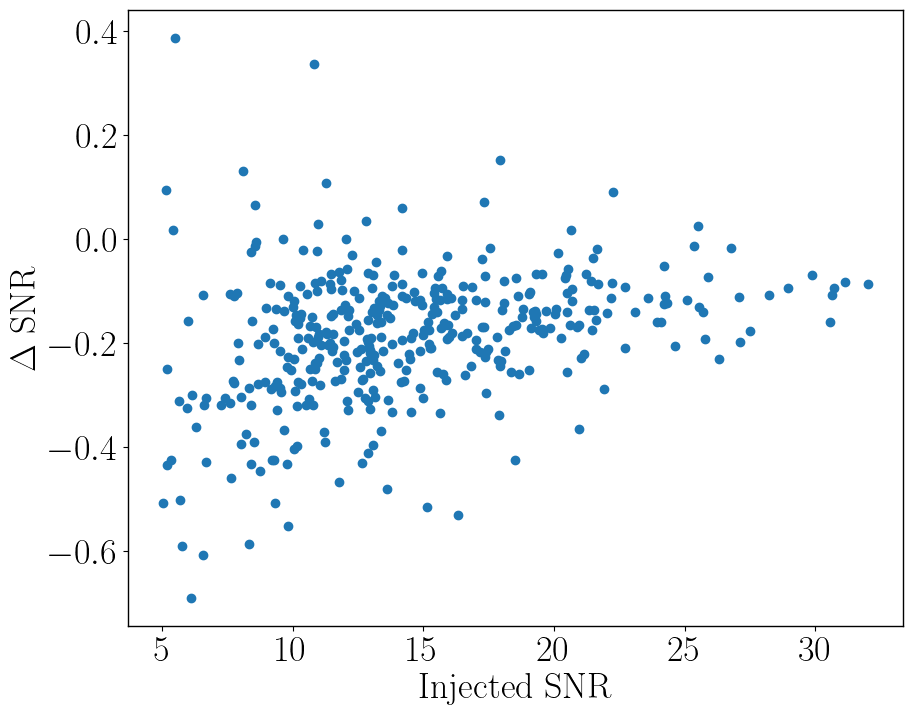

In [8]:
data = np.loadtxt('./results/BF_scaling_low_SNR220_ALL.dat')
idx = data.T[0]>5
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]
inferred_SNR = np.sqrt(2*log_BF - np.log(occams))
residual = inferred_SNR - SNRtot_MF
pl.plot(SNRtot_MF, residual, 'o')

# data = np.loadtxt('./results/BF_scaling_diff_acf_220_ALL.dat')
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T
# inferred_SNR = np.sqrt(2*log_BF - np.log(occams))
# residual = inferred_SNR - SNRtot_MF
# pl.plot(SNRtot_MF, residual, 'o')
pl.xlabel("Injected SNR")
pl.ylabel(r"$\Delta$ SNR")
pl.savefig("SNR_error_vs_SNR-220.pdf")

## FF != 0

Quadratic coefficient = 0.00388 +- 0.00024
FF = 0.9961


/tmp/ipykernel_35353/1011445684.py:11: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


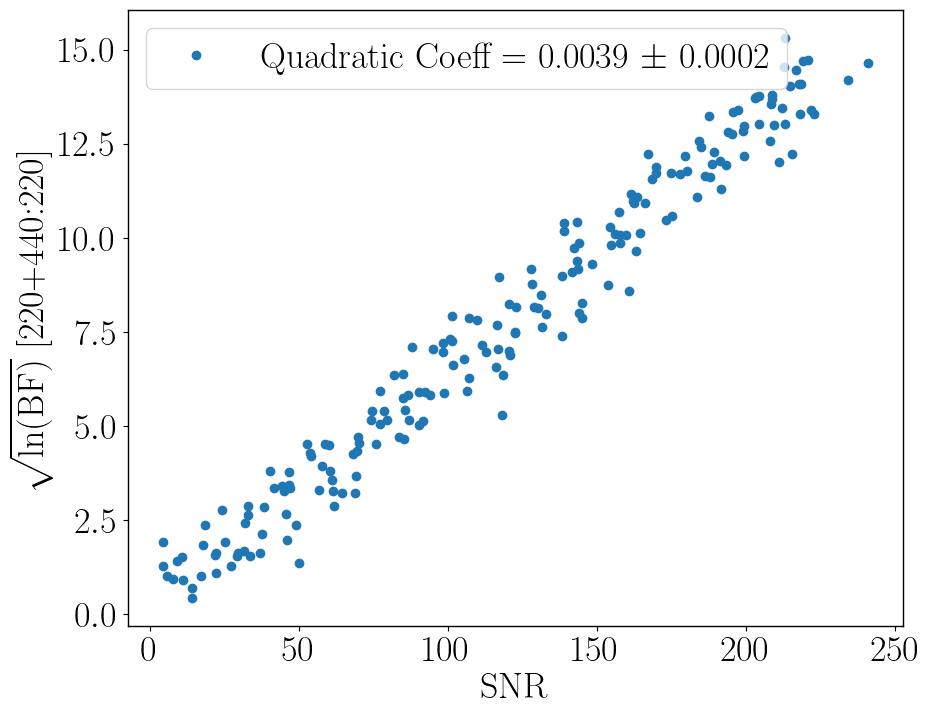

In [9]:
#no flow
data = np.loadtxt('./results/fixed_220+440_waveform_BF_scaling220+440:220_ALL.dat')
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
FF2 = np.sqrt(1-2*coeff[0])
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
print("FF = %.4f" % FF2)
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel(r'$\sqrt{\mathrm{ln(BF)}}$ [220+440:220]')
pl.legend()

Quadratic coefficient = 0.02173 +- 0.00323
FF = 0.9780


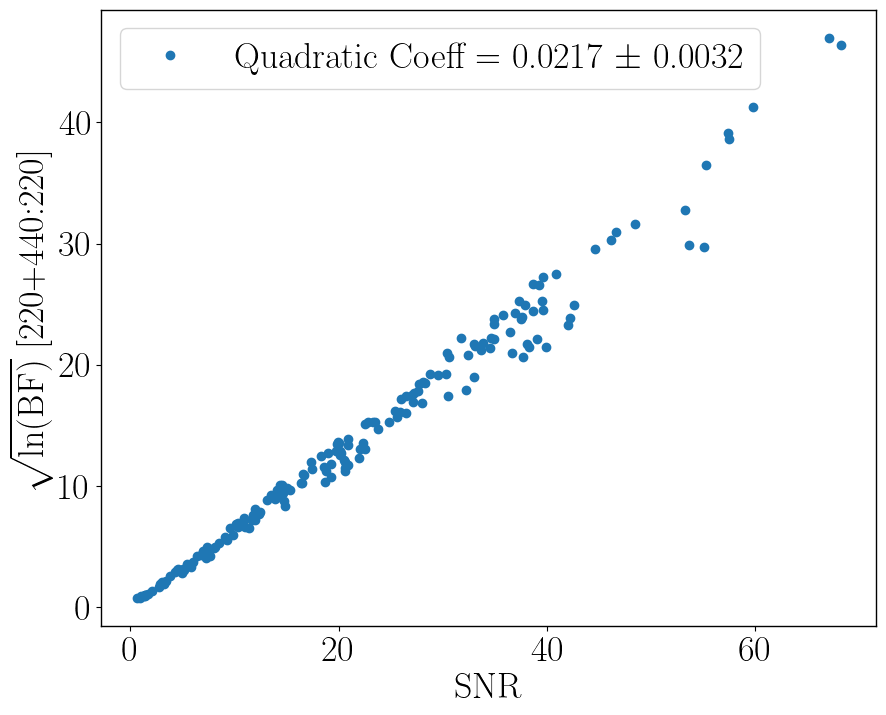

In [16]:
data = np.loadtxt('./results/testing1_randomised_220+440_waveform_BF_scaling220+440:220_ALL.dat')
# idx = data.T[0]<250
[SNRtot_MF, SNR220, SNR440, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
FF2 = np.sqrt(1-2*coeff[0])
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
print("FF = %.4f" % FF2)
# pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNR440, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel(r'$\sqrt{\mathrm{ln(BF)}}$ [220+440:220]')
pl.legend()

Quadratic coefficient = 0.02416 +- 0.00304
FF = 0.9755


/tmp/ipykernel_201009/350898067.py:12: RuntimeWarning: invalid value encountered in sqrt
  pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))


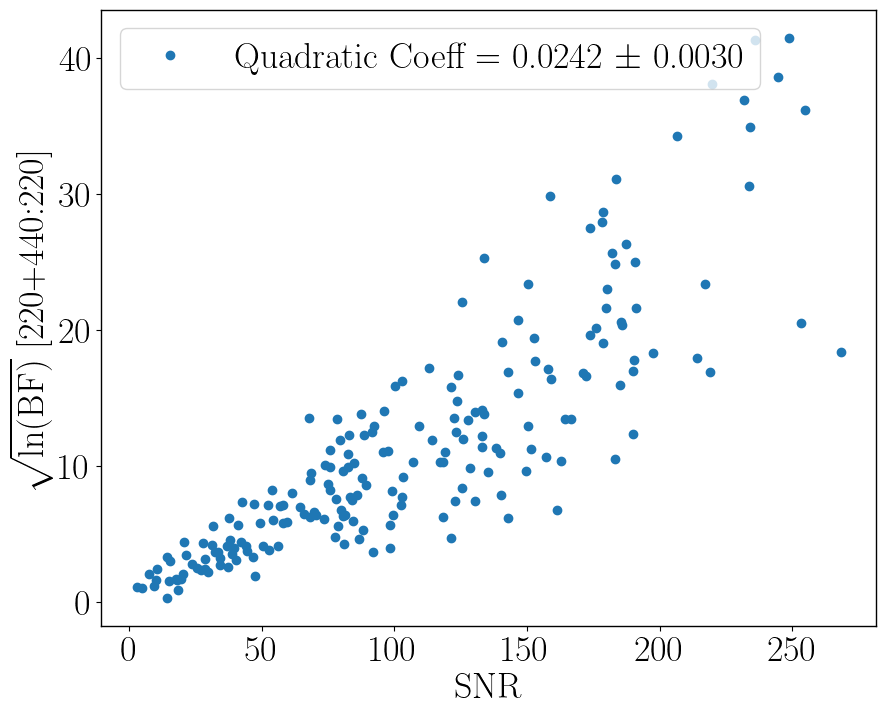

In [49]:
#no flow
data = np.loadtxt('./results/randomised_220+440_waveform_BF_scaling220+440:220_ALL.dat')
# idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
FF2 = np.sqrt(1-2*coeff[0])
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
print("FF = %.4f" % FF2)
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel(r'$\sqrt{\mathrm{ln(BF)}}$ [220+440:220]')
pl.legend()

/tmp/ipykernel_201009/572264049.py:8: RuntimeWarning: invalid value encountered in sqrt
  coeff0, err0 = np.polyfit(SNRtot_MF[log_BF>0], np.sqrt(log_BF)[log_BF>0], deg=1, cov=True)
/tmp/ipykernel_201009/572264049.py:10: RuntimeWarning: invalid value encountered in sqrt
  axs[0].plot(SNRtot_MF, np.sqrt(log_BF), 'o',
/tmp/ipykernel_201009/572264049.py:25: RuntimeWarning: invalid value encountered in sqrt
  axs[1].plot(SNRtot_MF, np.sqrt(log_BF), 'o')


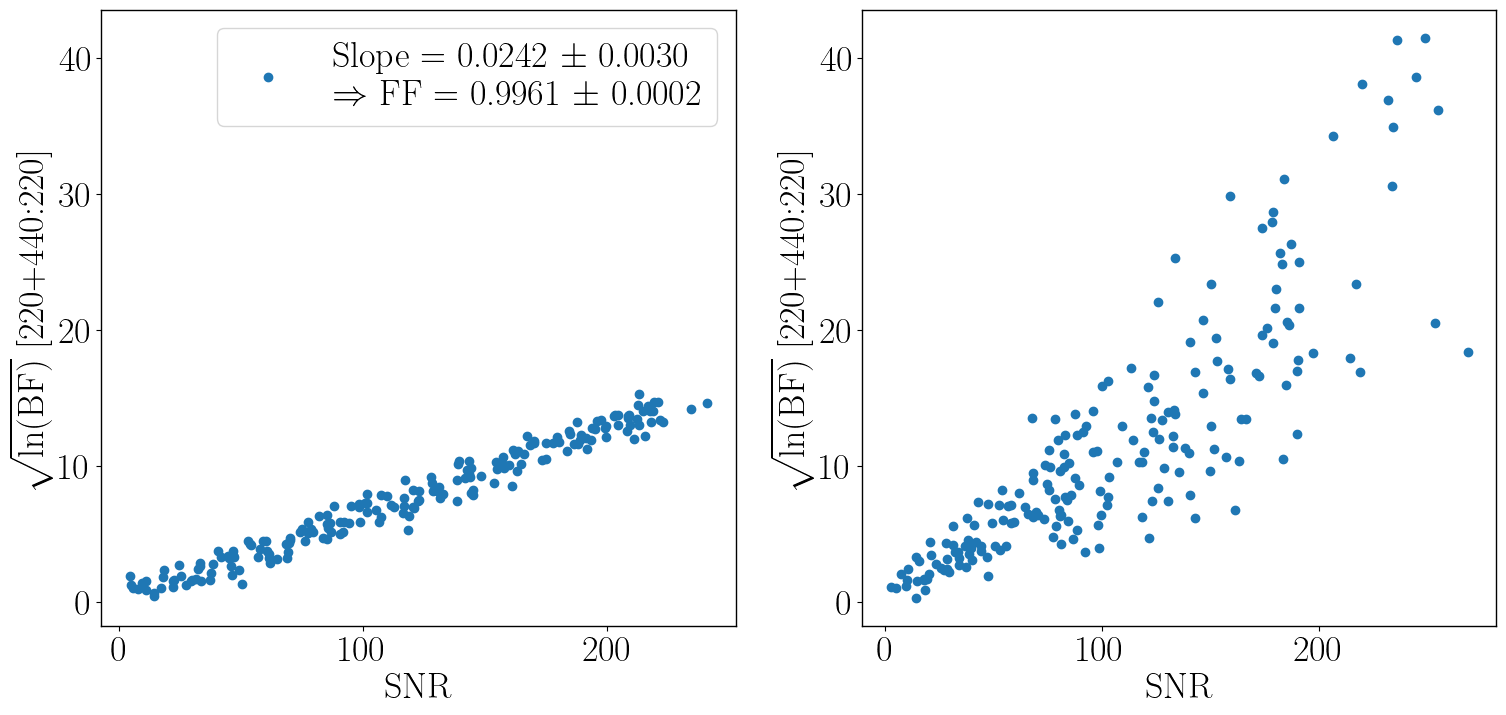

In [52]:
fig, axs = pl.subplots(1, 2, figsize = [18, 8], sharey = True)

data = np.loadtxt('./results/fixed_220+440_waveform_BF_scaling220+440:220_ALL.dat')
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T

log_BF = evidence_inj - evidence_filt
coeff0, err0 = np.polyfit(SNRtot_MF[log_BF>0], np.sqrt(log_BF)[log_BF>0], deg=1, cov=True)
coeff1, err1 = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
axs[0].plot(SNRtot_MF, np.sqrt(log_BF), 'o', 
            label=r'Slope = %.4f $\pm$ %.4f' "\n" r'$\Rightarrow$ FF = %.4f $\pm$ %.4f' \
            % (coeff[0], np.sqrt(err[0,0]), np.sqrt(1-2*coeff1[0]), abs(np.sqrt(1-2*(coeff1[0]+np.sqrt(err1[0,0]))) - np.sqrt(1-2*coeff1[0]))))
axs[0].set_xlabel("SNR")
axs[0].set_ylabel(r"$\sqrt{\mathrm{ln(BF)}}$ [220+440:220]")
axs[0].legend()

data = np.loadtxt('./results/randomised_220+440_waveform_BF_scaling220+440:220_ALL.dat')
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
# print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
log_BF = evidence_inj - evidence_filt
axs[1].plot(SNRtot_MF, np.sqrt(log_BF), 'o')
axs[1].set_xlabel("SNR")
axs[1].set_ylabel(r"$\sqrt{\mathrm{ln(BF)}}$ [220+440:220]")
axs[1].yaxis.set_tick_params(labelbottom=True)
pl.savefig("SNR_scaling-220+440:220.pdf")

Quadratic coefficient = 0.00165 +- 0.00027


/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


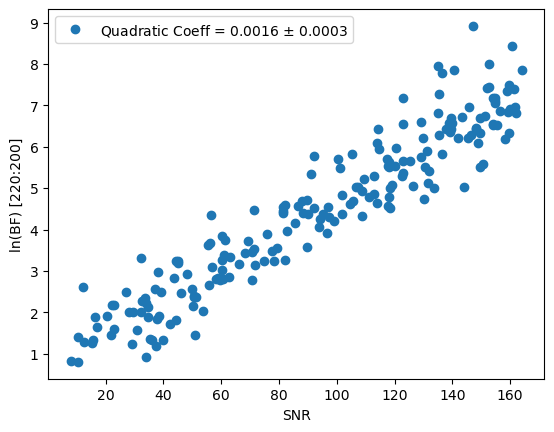

In [95]:
#no flow
data = np.loadtxt('./results/BF_scaling_allFixed220:200_ALL_OLD.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

In [96]:
np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)

(array([0.00164699, 0.05701245, 0.73619926]),
 array([[ 7.27960053e-08, -1.30116818e-05,  4.29716645e-04],
        [-1.30116818e-05,  2.43410743e-03, -8.68436655e-02],
        [ 4.29716645e-04, -8.68436655e-02,  3.69061544e+00]]))

Quadratic coefficient = 0.00146 +- 0.00023


/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


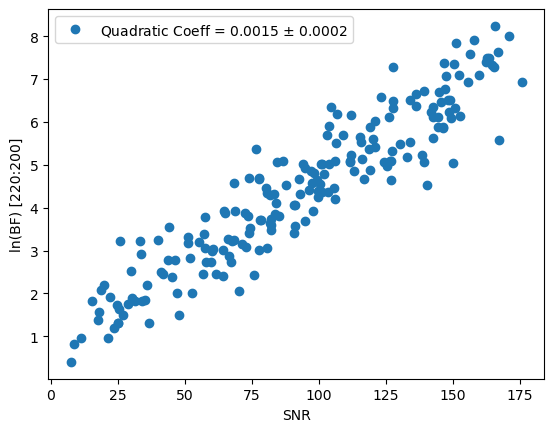

In [97]:
#also agrees with earlier no flow
data = np.loadtxt('./results/BF_scaling_allFixed_noFlow_220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

Quadratic coefficient = 0.00216 +- 0.00024


/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


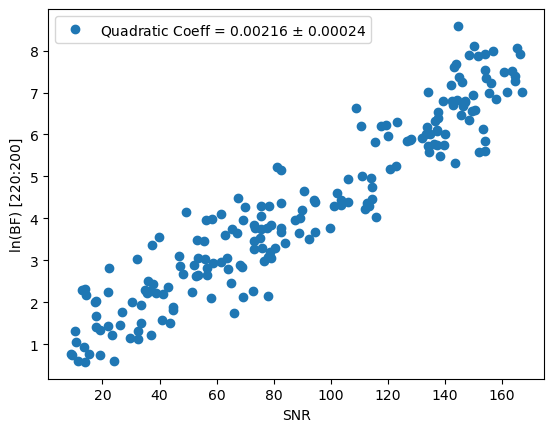

In [98]:
#Mislabeled, actually another no flow and agrees as well
data = np.loadtxt('./results/BF_scaling_allFixed_noFlow_noRemoveMean220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.5f $\pm$ %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

Quadratic coefficient = 0.00118 +- 0.00018


/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


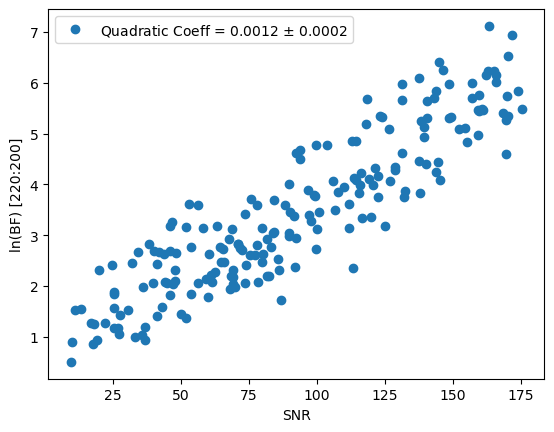

In [99]:
# Adding flow modifies the results
data = np.loadtxt('./results/BF_scaling_allFixed_flow=20_noRemoveMean220:200_ALL_incorrect.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

Quadratic coefficient = 0.00107 +- 0.00016


/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


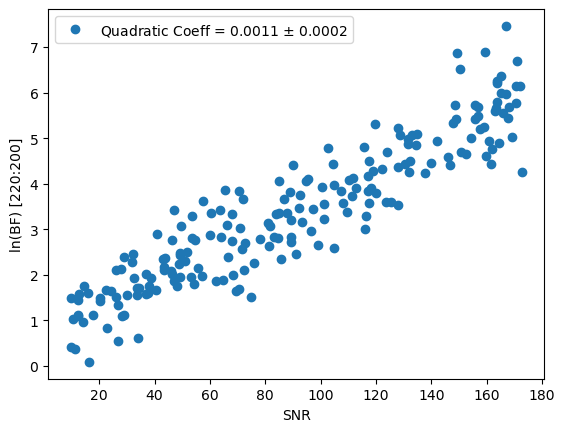

In [101]:
# Remove mean doesn't affect the flow=20 results
data = np.loadtxt('./results/BF_scaling_flow=20_removeMean=False220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o', label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend()

## All random

In [104]:
data = np.loadtxt('./results/BF_scaling_allRandom220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.02604 +- 0.00492


In [105]:
idx = log_BF>0
np.polyfit(SNRtot_MF[idx], np.sqrt(log_BF)[idx], deg=1)

/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([ 0.06274851, -0.92956243])

/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


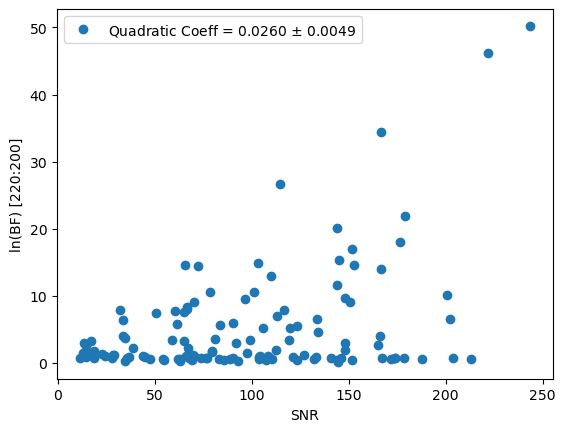

In [106]:
log_BF = evidence_inj - evidence_filt
pl.plot(SNRtot_MF, np.sqrt(log_BF), 'o',  label=r'Quadratic Coeff = %.4f $\pm$ %.4f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel("ln(BF) [220:200]")
pl.legend(loc="upper left")

## Plotting

/tmp/ipykernel_201009/268505252.py:9: RuntimeWarning: invalid value encountered in sqrt
  coeff0, err0 = np.polyfit(SNRtot_MF[log_BF>0], np.sqrt(log_BF)[log_BF>0], deg=1, cov=True)
/tmp/ipykernel_201009/268505252.py:11: RuntimeWarning: invalid value encountered in sqrt
  axs[0].plot(SNRtot_MF, np.sqrt(log_BF), 'o',
/tmp/ipykernel_201009/268505252.py:27: RuntimeWarning: invalid value encountered in sqrt
  axs[1].plot(SNRtot_MF, np.sqrt(log_BF), 'o')


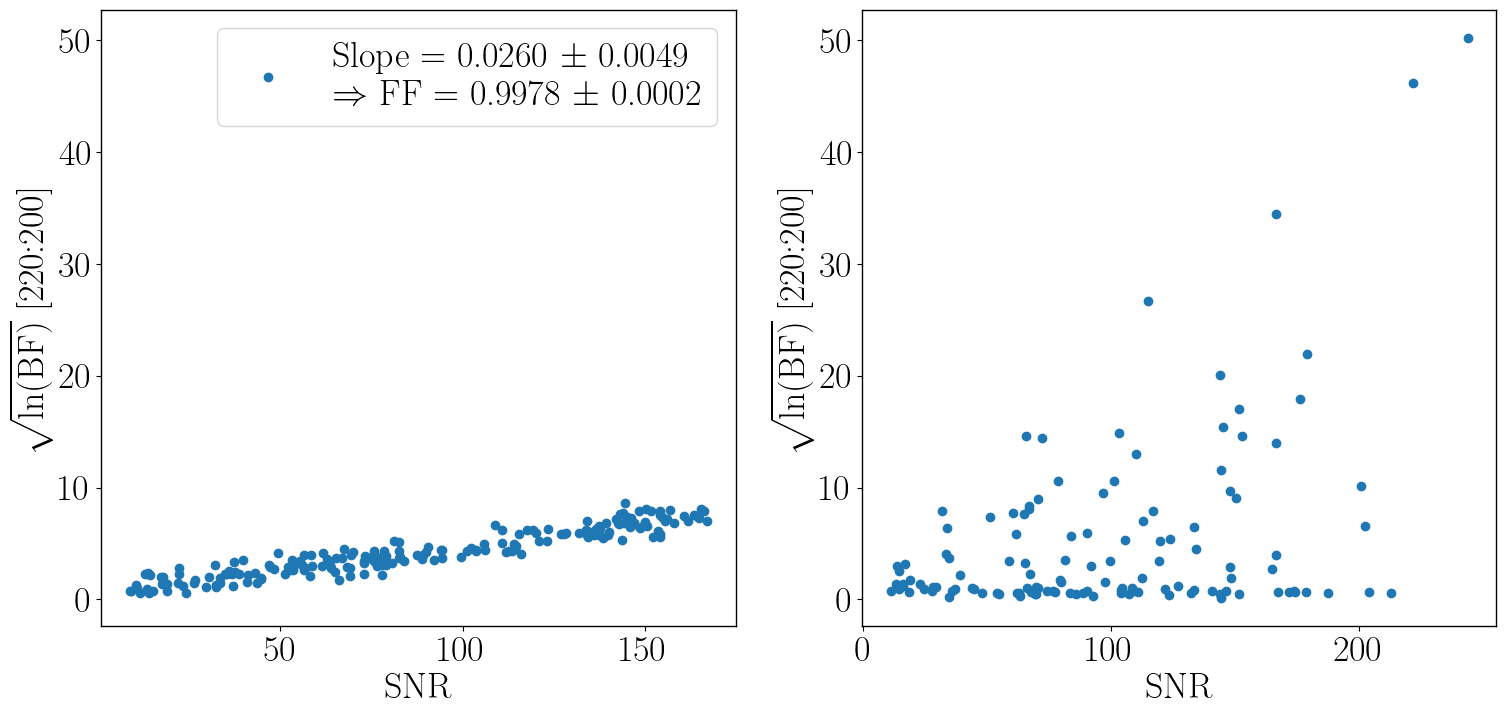

In [21]:
fig, axs = pl.subplots(1, 2, figsize = [18, 8], sharey = True)

data = np.loadtxt('./results/BF_scaling_allFixed_noFlow_noRemoveMean220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff0, err0 = np.polyfit(SNRtot_MF[log_BF>0], np.sqrt(log_BF)[log_BF>0], deg=1, cov=True)
coeff1, err1 = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
axs[0].plot(SNRtot_MF, np.sqrt(log_BF), 'o', 
            label=r'Slope = %.4f $\pm$ %.4f' "\n" r'$\Rightarrow$ FF = %.4f $\pm$ %.4f' \
            % (coeff[0], np.sqrt(err[0,0]), np.sqrt(1-2*coeff1[0]), abs(np.sqrt(1-2*(coeff1[0]+np.sqrt(err1[0,0]))) - np.sqrt(1-2*coeff1[0]))))
axs[0].set_xlabel("SNR")
axs[0].set_ylabel(r"$\sqrt{\mathrm{ln(BF)}}$ [220:200]")
axs[0].legend()

data = np.loadtxt('./results/BF_scaling_allRandom220:200_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, evidence_inj, evidence_filt, nofilter, \
occams_inj,occams_filt, mass_in_solar, chi_inject] = data.T[:,idx]

log_BF = evidence_inj - evidence_filt
coeff, err = np.polyfit(SNRtot_MF, log_BF, deg=2, cov=True)
# print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))
log_BF = evidence_inj - evidence_filt
axs[1].plot(SNRtot_MF, np.sqrt(log_BF), 'o')
axs[1].set_xlabel("SNR")
axs[1].set_ylabel(r"$\sqrt{\mathrm{ln(BF)}}$ [220:200]")
axs[1].yaxis.set_tick_params(labelbottom=True)
pl.savefig("SNR_scaling-220:200.pdf")